In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [8]:
# Get data
data = pd.read_csv('../resources/data/data_fred_matlab.csv')

# Set date as index of df
data['sasdate'] = pd.to_datetime(data['sasdate'])
data.set_index('sasdate', inplace=True)

# Select only data from 1960-01-01 untill 2019-12-01
data = data.loc[(data.index >= '1960-01-01') & (data.index <= '2019-12-01')]

# Drop last column (unnamed)
data.drop(data.columns[-1], axis=1, inplace=True)

print("Data shape: ", data.shape)
data.head()


Data shape:  (720, 128)


,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,MZMSL,DTCOLNVHFNM,DTCTHFNM,INVEST,VXOCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1960-01-01,0.003193,0.004647,0.002784,0.016960,0.026606,0.025916,0.024100,0.029022,0.031235,0.103832,...,-0.001285,-0.004680,0.007797,-0.009705,-2.347448,-0.002451,0.004292,-0.011739,-0.013330,20.704305
1960-02-01,0.001145,0.000919,0.004327,0.014412,0.003696,-0.008937,-0.005684,-0.003439,-0.011455,-0.013858,...,0.000767,-0.004555,0.003853,-0.004750,-1.471062,-0.000001,0.008268,0.005388,-0.018942,16.198056
1960-03-01,0.001910,0.000918,0.014072,-0.028021,-0.001102,-0.009017,-0.003429,-0.001146,0.001154,-0.019963,...,-0.001025,-0.000020,0.030131,-0.004684,-3.569769,0.001738,0.003472,0.000951,0.003490,31.832723
1960-04-01,0.003426,0.003621,0.015382,0.009836,0.025903,-0.007961,0.002287,0.001146,0.006880,-0.001189,...,0.001531,-0.008949,-0.068074,0.000000,1.501161,-0.001048,0.008678,0.005452,0.024136,8.951634
1960-05-01,0.002403,0.002448,-0.020417,-0.031588,-0.015047,-0.001143,0.005691,0.006866,0.005698,0.009454,...,0.000504,0.008949,0.041620,0.000000,-1.552750,0.001035,-0.004827,-0.002067,0.003798,28.284980


In [10]:
# Inspecting data properties
data['INDPRO'].describe()

count    720.000000
mean       0.002095
std        0.007478
min       -0.044337
25%       -0.001667
50%        0.002385
75%        0.006443
max        0.030432
Name: INDPRO, dtype: float64

In sample PCA to compare to the original paper. Paper uses Jan 1960 to Dec 2019

[-1.39560088e-01 -1.34494266e-01 -1.18204269e-01 -1.15903122e-01
 -1.13762962e-01 -1.11789436e-01 -1.04078772e-01 -1.03473334e-01
 -9.48283443e-02 -9.11184442e-02 -9.04065960e-02 -8.93634276e-02
 -8.56039913e-02 -8.33641471e-02 -8.18349187e-02 -8.07964737e-02
 -7.83511763e-02 -7.80988401e-02 -7.65477545e-02 -7.59054578e-02
 -7.41354009e-02 -7.24384726e-02 -7.17380142e-02 -7.12500262e-02
 -7.11029107e-02 -7.03951005e-02 -7.03279182e-02 -7.01912481e-02
 -7.00253354e-02 -6.97725044e-02 -6.84274430e-02 -6.59728946e-02
 -6.55337591e-02 -6.52910732e-02 -6.41984673e-02 -5.93581871e-02
 -5.87062036e-02 -5.71758834e-02 -5.71754316e-02 -5.69590769e-02
 -5.58674273e-02 -5.58549338e-02 -5.51638714e-02 -5.49901533e-02
 -5.43037109e-02 -5.42013414e-02 -5.36545912e-02 -5.32747905e-02
 -5.31935318e-02 -5.27585585e-02 -5.25458036e-02 -5.25326994e-02
 -5.23384176e-02 -5.12073847e-02 -5.03235689e-02 -4.86554177e-02
 -4.85721250e-02 -4.81631555e-02 -4.79156989e-02 -4.76680031e-02
 -4.72525845e-02 -4.70533

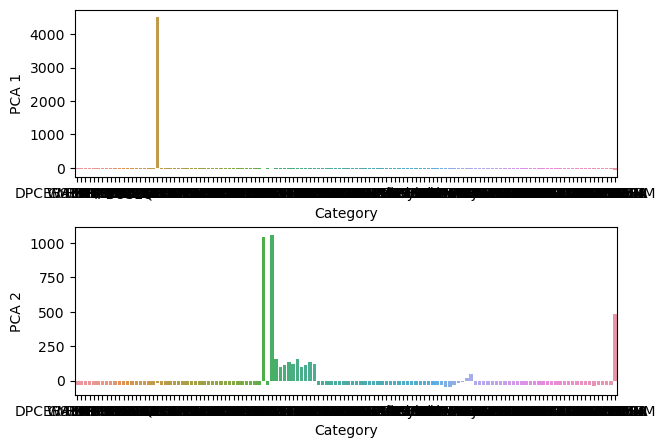

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create a PCA instance: pca
pca = PCA(n_components=15)

data_corr = data.corr()
data_pca = data.transpose()

# Fit the PCA instance to the scaled samples
pca.fit(data_pca)

# Get the explained variances from pca
eigen_values = pca.explained_variance_ratio_

# Eigenvectors are the components
eigen_vectors = pca.components_

print(np.sort(eigen_vectors[0,:]))

# Transform the scaled samples: pca_features
pca_features = pca.transform(data_pca)

plots = 2
fig, ax = plt.subplots(plots, 1, figsize=(7, 5))
plt.subplots_adjust(hspace=0.3)

for i in range(plots):
    sns.barplot(x = data_pca.index, y=pca_features[:,i], ax=ax[i])
    ax[i].set_xlabel('Category')
    ax[i].set_ylabel('PCA {}'.format(i+1))


In [41]:
import numpy as np

def pc_T(y, nfac):
    # y is a TxN matrix of data
    # nfac is the number of factors to extract

    bigt, bign = y.shape

    yy = np.dot(y.T, y)

    eigval, Fhat0 = np.linalg.eigh(yy)
    eigval = eigval[::-1]    # Eigenvalues are in ascending order by default, so reversing them to match Matlab code
    Fhat0 = Fhat0[:, ::-1]   # Eigenvectors are sorted by corresponding eigenvalues, so reversing the order

    fhat = np.dot(Fhat0[:, :nfac], np.sqrt(bigt))
    print(fhat.shape, "fhat shape")

    lambda_ = np.matmul(y,fhat) / bigt
    print(lambda_.shape, "lambda shape")

    f_dot_lambda = np.dot(fhat, lambda_.T)
    print(f_dot_lambda.shape, "f_dot_lambda shape")

    ehat = y - f_dot_lambda.T

    ve2 = np.sum(ehat ** 2, axis=1) / bign

    ss = eigval

    # Return the results
    return ehat, fhat, lambda_, ve2, ss, eigen_vectors

# Get the explained variances from pca
ehat, fhat, lambda_, ve2, eigen_values, _ = pc_T(data,5)
print(eigen_values/np.sum(eigen_values))

(128, 5) fhat shape
(720, 5) lambda shape
(128, 720) f_dot_lambda shape
[8.74696069e-01 1.23026036e-01 1.41123325e-03 4.36442244e-04
 2.99248147e-04 3.83386624e-05 2.42138355e-05 1.81484824e-05
 1.17355187e-05 9.51761183e-06 6.53847012e-06 3.94303670e-06
 3.66096156e-06 2.77102300e-06 1.71005295e-06 1.53378475e-06
 1.36852079e-06 9.92044386e-07 7.83211227e-07 5.82470889e-07
 5.34925480e-07 4.91560998e-07 4.46075073e-07 3.80841837e-07
 3.48654846e-07 3.00689568e-07 2.49532067e-07 2.34531521e-07
 2.14977692e-07 2.06817798e-07 1.97149898e-07 1.70072105e-07
 1.61368239e-07 1.40118463e-07 1.35773204e-07 1.14055467e-07
 1.05263440e-07 1.00616233e-07 8.31834004e-08 7.62803143e-08
 5.27065307e-08 5.06248939e-08 3.95591977e-08 3.84858143e-08
 2.85278237e-08 2.56475514e-08 2.41482015e-08 1.96018444e-08
 1.81559146e-08 1.32782283e-08 1.27025098e-08 1.11327980e-08
 1.07768402e-08 8.91555542e-09 8.58903977e-09 6.97161814e-09
 6.36384315e-09 5.23495419e-09 4.99695901e-09 4.67522975e-09
 3.88619254e-

In [370]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE

def predict_pca(data, h_steps=1, response='CPIAUCSL', test_start='1985-01-01'):
    # Split into train and test sets with train ending at december 1984
    initial_train = data[:test_start]
    initial_test = data[test_start:]

    T_train = initial_train.shape[0]
    T_test = initial_test.shape[0]
    T = data.shape[0]

    # Split into X and y
    X = data
    y = data[response]

    # Shift y by h steps
    y = y.shift(h_steps)

    # Initialize the list of MSE's
    preds = []
    actuals = []


    # t is where the test set start
    for t in range(T_train, T):

        # Split into X and y, dropping first h rows from training data to account for the shift
        X_train, y_train = X[h_steps:t], y[h_steps:t]
        X_test, y_test = X[t:(t + h_steps)], y[t:(t + h_steps)]
        
        # Scale the features by the slope of the regression line
        X_train = scale_X(X_train, y_train)

        # Apply PCA to the features
        pca = PCA(n_components=5)
        pca.fit(X_train)
        
        # Transform the training and test sets
        X_train_pca = pca.transform(X_train)
        X_test_pca = pca.transform(X_test.values)

        # Fit the model to the training data
        model = LinearRegression()
        model.fit(X_train_pca, y_train)    

        # Make predictions 1 step ahead
        y_pred = model.predict(X_test_pca)

        # Compute the MSE
        preds.append(y_pred)
        actuals.append(y_test.values)


    return actuals, preds

def scale_X(X_train, y_train):
    X_train = X_train.copy()
    T = X_train.shape[0]

    # Standardize the data
    scaler = StandardScaler()
    X_train_standardized = scaler.fit_transform(X_train)

    slopes = []

    for i in range(X_train.shape[1]):
        # Seperate the predictor from the rest of the data
        X_predictor = X_train_standardized[:,i].reshape(-1, 1)

        # Fit the model
        lr = LinearRegression(fit_intercept=True)
        lr.fit(X_predictor, y_train)

        # Obtain the slope coefficient which is the beta
        slope = lr.coef_
        slopes.append(slope)

    scaler_demean = StandardScaler(with_mean=False, with_std=False)
    X_train_demeaned = scaler_demean.fit_transform(X_train)

    for i, slope in enumerate(slopes):
        X_train_demeaned[:,i] = X_train_demeaned[:,i] * slope

    return np.sqrt(T) * X_train_demeaned

def compute_R2(actuals, preds):
    SSR = []
    SST = []
    for i in range(len(actuals)):
        SSR.append(np.sum((actuals[i] - preds[i])**2))
        SST.append(np.sum((actuals[i] - np.mean(actuals[i]))**2))

    SSR = np.sum(SSR)
    SST = np.sum(SST)

    print("SSR: ", SSR, "SST: ", SST)
    R2 = 1 - SSR/SST
    return R2

In [369]:
actual_y, predicted_y = predict_pca(data, 1)

-inf


C:\Users\Vincent\AppData\Local\Temp\ipykernel_8508\2042118580.py:95: RuntimeWarning: divide by zero encountered in double_scalars
  R2 = 1 - np.sum(SSR)/np.sum(SST)


In [371]:
print(compute_R2(actual_y, predicted_y))

SSR:  1930.893431008673 SST:  0.0
-inf


C:\Users\Vincent\AppData\Local\Temp\ipykernel_8508\2607139705.py:99: RuntimeWarning: divide by zero encountered in double_scalars
  R2 = 1 - SSR/SST
